# Overview

We are moving toward selecting a group for each researcher to focus on. We used topcat to explore the `vf_v2_kourkchi_galaxies.fits` table.  The column `PGC1` is the ID number of the primary galaxy in the group.  You can select all group members by finding all galaxies with the same `PGC1` as the primary group member.

We used topcat to sort the `vf_v2_kourkchi_galaxies.fits` table by `Mem`, which is the column that indicates how many galaxies are in the group.  The first two groups are associated with the Virgo cluster, and the third group is east of the Virgo cluster, in the Virgo III filament.

# Goals

* Learn how to read in the Virgo v2 tables
* Learn how to make a class that inherits vtables
* Learn how to make plots using the new class

In [42]:
from matplotlib import pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [43]:
%run ~/github/Virgo/programs/readtablesv2.py

In [44]:
# to see what tables are associated with the class
help(v)

Help on vtables in module __main__ object:

class vtables(builtins.object)
 |  vtables(tabledir, tableprefix)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, tabledir, tableprefix)
 |      class containing all tables for virgo filament project
 |  
 |  read_a100(self)
 |      read in ALFALFA 100 table; store as self.a100
 |  
 |  read_agc(self)
 |      read in AGC table; store as self.agc
 |  
 |  read_all(self)
 |  
 |  read_co(self)
 |      read in CO table; store as self.co
 |  
 |  read_env(self)
 |      read in GC's env and BV envsummary table; store as self.env
 |  
 |  read_ephot(self)
 |      read in elliptical aperture photometry from John
 |  
 |  read_extinction(self)
 |      read in extinction table
 |  
 |  read_filaments(self)
 |      read in GC's filament_membership catalog
 |  
 |  read_galfit(self)
 |      read in galfit tables of single-component Sersic fits; store as self.galfit_{} [g,r,z,W1,W2,W3,W4]
 |  
 |  read_halpha(self)
 |      read in halpha observati

In [45]:
# Kourkchi & Tully Table
v.kt

VFID,PGC,R.A.,Dec.,Glon,Glat,SGL,SGB,PGC1,Mem,log_Mass_lum_adapted,Kflag
bytes8,int64,float64,float64,float64,float64,float64,float64,int64,int64,float64,bool
VFID0000,40233,185.8697,74.9523,125.3702,42.0434,41.7623,13.1313,39791,14,12.918,True
VFID0001,38578,182.208,74.9043,126.6409,41.9158,41.5829,12.1943,39791,14,12.918,True
VFID0002,27845,145.9446,74.8596,136.7127,36.7942,36.5819,4.3049,27845,1,12.228,True
VFID0003,40048,185.5731,74.8384,125.4961,42.1445,41.8605,13.0322,39791,14,12.918,True
VFID0004,38805,182.8278,74.8082,126.456,42.0444,41.7206,12.326,39791,14,12.918,True
VFID0005,35608,173.1342,74.6276,129.7859,41.4339,41.0361,9.8573,35608,1,11.595,True
VFID0006,22815,121.9124,74.5846,139.9986,31.1184,31.203,1.0238,22815,1,11.033,True
VFID0007,22064,118.2366,74.5764,140.1833,30.1542,30.2644,0.7515,22064,1,11.021,True
VFID0008,61742,274.9431,74.5684,105.5357,28.1747,29.1741,30.9384,61742,1,12.362,True


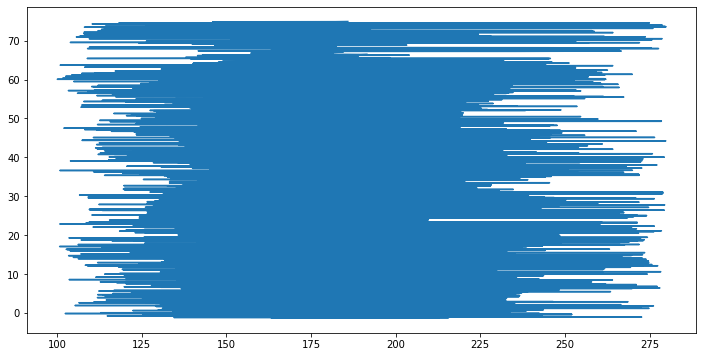

In [46]:
# plot location of all galaxies in catalog
# also plot location of group PGC1=41220

plt.figure(figsize=(12,6))

plt.plot(v.main['RA'],v.main['DEC'],)

In [47]:
v.

SyntaxError: invalid syntax (<ipython-input-47-c419207a89da>, line 1)

In [86]:
class myplots(vtables):
    def plot_group(self, PGC1, color='g', plotsingle=True):
        if plotsingle:
            plt.figure(figsize=(12,6))
        plt.plot(self.main['RA'],self.main['DEC'],'k.',alpha=.1)
        
        # plot group
        self.groupflag = self.kt['PGC1'] == PGC1
        
        plt.plot(self.main['RA'][self.groupflag],self.main['DEC'][self.groupflag],'go',alpha=.6,c=color)
        plt.gca().invert_xaxis()
        

        plt.xlabel("RA (deg)",fontsize=16)
        plt.ylabel("DEC (deg)",fontsize=16)
        
    def get_group_galaxy_names(self):
        self.grouphaflag = self.groupflag & self.main['HAobsflag']
        print(self.main['prefix'][self.grouphaflag])
        
    def halpha_sources(self, plotsingle=True):
        """ plot location of halpha sources """
        if plotsingle:
            plt.figure(figsize=(12,6))
        plt.plot(self.main['RA'],self.main['DEC'],'k.',alpha=.1)
        
        # plot group
        haflag = self.main['HAobsflag']         
        plt.plot(self.main['RA'][haflag],self.main['DEC'][haflag],'c*',alpha=.6)
        plt.gca().invert_xaxis()
        plt.xlabel("RA (deg)",fontsize=16)
        plt.ylabel("DEC (deg)",fontsize=16)
        
    def plotboth(self, PGC1):
        """ plot location of halpha sources """
        plt.figure(figsize=(12,6))
        plt.plot(self.main['RA'],self.main['DEC'],'k.',alpha=.1)
        
        # plot halpha
        haflag = self.main['HAobsflag']         
        plt.plot(self.main['RA'][haflag],self.main['DEC'][haflag],'co',alpha=.1)
        
        
        # plot group
        groupflag = self.kt['PGC1'] == PGC1
        plt.plot(self.main['RA'][groupflag],self.main['DEC'][groupflag],'go',alpha=.1)
        
        plt.gca().invert_xaxis()
        plt.xlabel("RA (deg)",fontsize=16)
        plt.ylabel("DEC (deg)",fontsize=16)
        

In [87]:
p = myplots(v.tabledir,v.tableprefix)
p.read_all()


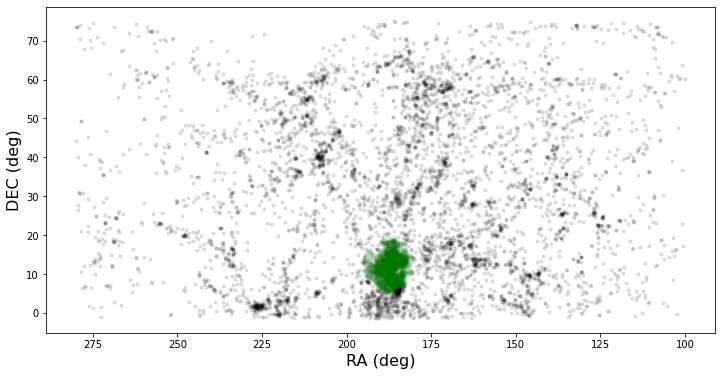

In [50]:
p.plot_group(41220)

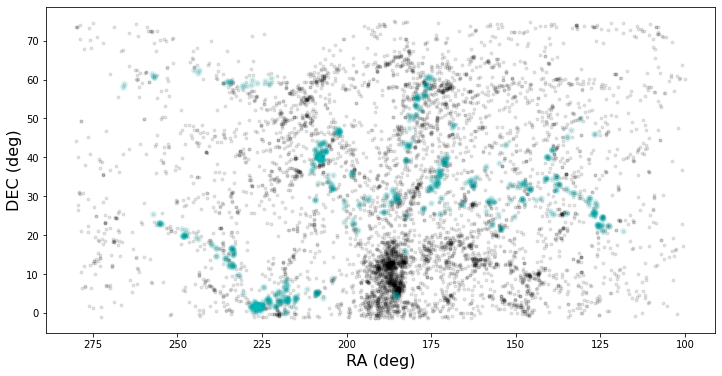

In [51]:
p.halpha_sources()

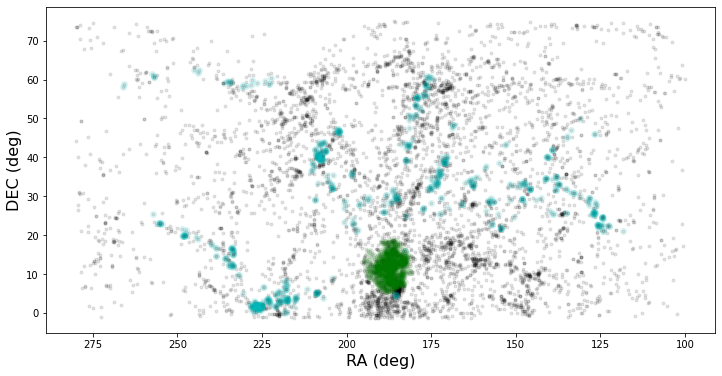

In [52]:
p.plotboth(41220)

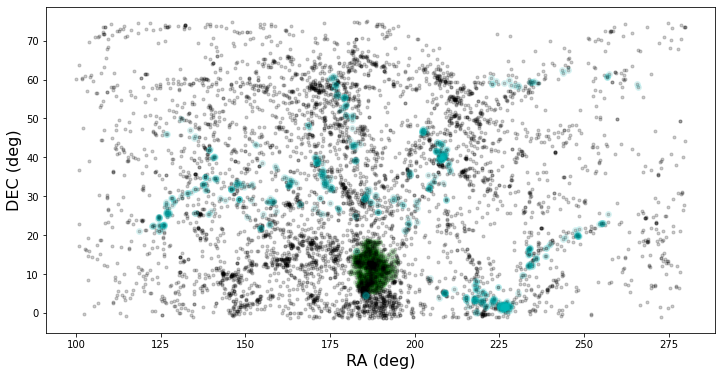

In [53]:
# plot both
plt.figure(figsize=(12,6))
p.plot_group(41220,plotsingle=False)
p.halpha_sources(plotsingle=False)

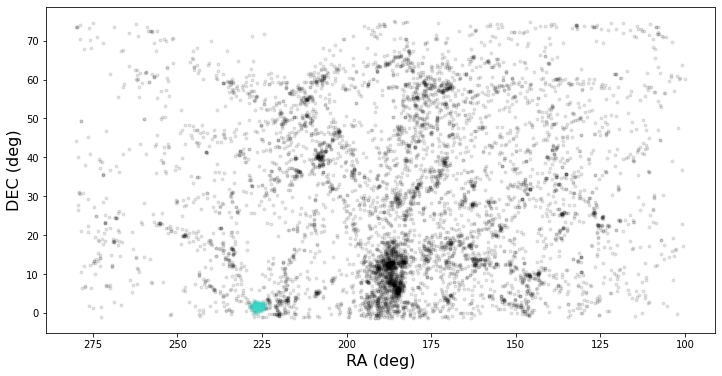

In [54]:
groupID = 39659
groupID = 53932
p.plot_group(groupID,color='turquoise')

(160.0, 180.0, 50.0, 70.0)

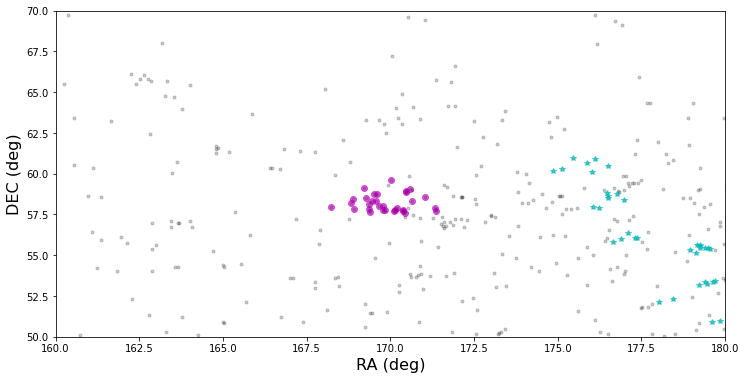

In [65]:
groupID =34566
plt.figure(figsize=(12,6))
p.plot_group(groupID,plotsingle=False,color='m')
p.halpha_sources(plotsingle=False)
plt.axis([160,180,50,70])

In [66]:
# print out members of our group

allgroups = set(p.kt['PGC1'])

TypeError: unhashable type: 'MaskedConstant'

In [71]:
PGC1_allgroups = set(p.kt['PGC1'][~p.kt['PGC1'].mask])

In [169]:
ngroups = 0
for PGC1 in PGC1_allgroups:
    Halphaflag = (p.kt['PGC1'] == PGC1) & (p.main['HAobsflag'])

    if np.sum(Halphaflag) > 3:
        ngroups += 1
        groupmass = v.kt['log_Mass_lum_adapted'][p.kt['PGC'] == PGC1][0]
        print(f"group {PGC1}: numb halpha = {np.sum(Halphaflag)} (logM = {groupmass})")
print()
print(f"Total number of groups that meet criteria = {ngroups}")

group 49356: numb halpha = 41 (logM = 13.772)
group 49547: numb halpha = 8 (logM = 12.757)
group 58470: numb halpha = 4 (logM = 12.623)
group 25806: numb halpha = 4 (logM = 11.912)
group 25955: numb halpha = 4 (logM = 12.064)
group 26649: numb halpha = 5 (logM = 12.439)
group 51233: numb halpha = 7 (logM = 12.945)
group 59426: numb halpha = 7 (logM = 12.726)
group 34908: numb halpha = 4 (logM = 11.954)
group 35064: numb halpha = 6 (logM = 12.919)
group 51787: numb halpha = 12 (logM = 12.417)
group 35754: numb halpha = 5 (logM = 11.841)
group 27777: numb halpha = 6 (logM = 12.396)
group 52365: numb halpha = 6 (logM = 12.447)
group 52665: numb halpha = 5 (logM = 13.021)
group 28357: numb halpha = 7 (logM = 12.041)
group 53247: numb halpha = 6 (logM = 12.692)
group 36914: numb halpha = 4 (logM = 12.272)
group 36921: numb halpha = 4 (logM = 12.17)
group 53932: numb halpha = 71 (logM = 13.688)
group 37617: numb halpha = 7 (logM = 12.962)
group 37642: numb halpha = 6 (logM = 12.559)
group 30

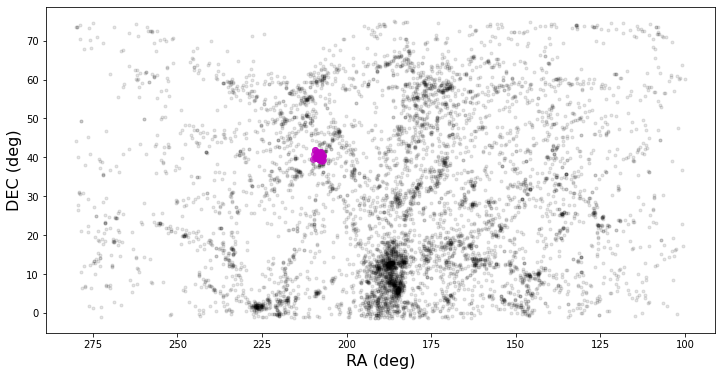

In [88]:
groupID =53932
groupID = 49356
plt.figure(figsize=(12,6))
p.plot_group(groupID,plotsingle=False,color='m')

In [89]:
# find the name of primary group member
p.get_group_galaxy_names()


              prefix             
---------------------------------
                 VFID1942-NGC5383
                VFID1944-UGC08877
                 VFID1988-NGC5320
                 VFID1993-NGC5362
VFID2011-WISEAJ135527.51+410819.9
VFID2039-WISEAJ135407.50+404901.3
                VFID2040-UGC08807
 VFID2049-SDSSJ135504.83+403417.5
 VFID2055-SDSSJ135414.16+402838.5
                 VFID2057-NGC5371
                              ...
             VFID2138-KUG1347+399
                  VFID2140-IC4336
                 VFID2144-NGC5337
                 VFID2153-NGC5346
                 VFID2154-NGC5326
VFID2156-WISEAJ135224.88+393327.3
                VFID2160-UGC08736
 VFID2165-SDSSJ135131.08+392717.0
 VFID2170-SDSSJ134758.30+392322.0
  VFID2176-2MASXJ13510523+3922097
VFID2192-WISEAJ134847.47+391148.3
Length = 41 rows


In [90]:
# name of galaxy that is the primary inthe group 
groupID = 49356

flag = p.kt['PGC'] == groupID

print(p.main['prefix'][flag])


     prefix     
----------------
VFID2074-NGC5353


# Finding an Image and Downloading It

In [156]:
from astroquery.ned import Ned

In [158]:
image_list = Ned.get_image_list("NGC 4064",item="image")

In [164]:
for i,il in enumerate(image_list):
    if 'kky2001' in il:
        print(i,il)

7 http://ned.ipac.caltech.edu/img/2001ApJS..135..125K/NGC_4064:I:Ha:kky2001.fits.gz
9 http://ned.ipac.caltech.edu/img/2001ApJS..135..125K/NGC_4064:I:nR:kky2001.fits.gz


In [166]:
!curl http://ned.ipac.caltech.edu/img/2001ApJS..135..125K/NGC_4064:I:Ha:kky2001.fits.gz --output temp.fits.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  937k  100  937k    0     0   615k      0  0:00:01  0:00:01 --:--:--  614k


# Analyzing Two Images with Photwrapper

In [108]:
os.chdir("/Users/rfinn/research/Virgo-dev/cont-sub-gr/temp")

In [122]:
!ls

VFID5855-NGC5348-INT-20190206-p120-CS-gr.fits
VFID5855-NGC5348-INT-20190206-p120-R-mask.fits
VFID5855-NGC5348-INT-20190206-p120-R.fits
VFID6362-UGC09661-BOK-20210418-VFID6406-CS-gr.fits
VFID6362-UGC09661-BOK-20210418-VFID6406-R.fits


In [113]:
from astropy.io import fits
from matplotlib import pyplot as plt

In [123]:
rhdu = fits.open('VFID6362-UGC09661-BOK-20210418-VFID6406-R.fits')

In [124]:
rhdu

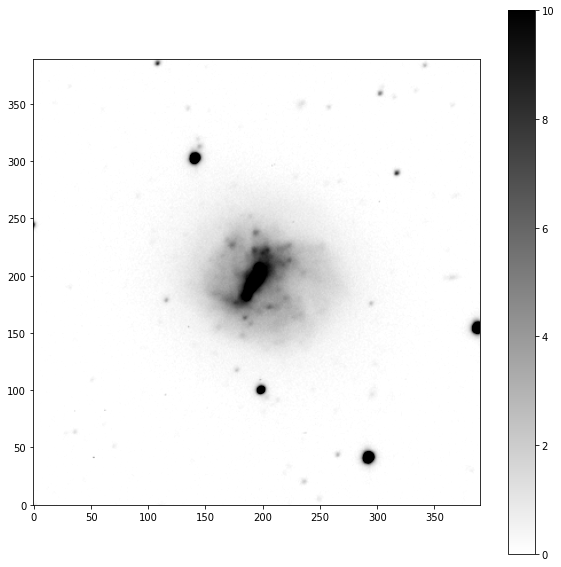

In [126]:
plt.figure(figsize=(10,10))
plt.imshow(rhdu[0].data,cmap='gray_r',vmin=0,vmax=10,origin="lower")
plt.colorbar()

In [127]:
import sys

In [128]:
sys.path.append("/Users/rfinn/github/halphagui/")

In [129]:
import photwrapper

In [130]:
# use photwrapper to run elliptical photometry

In [131]:
!ls

VFID5855-NGC5348-INT-20190206-p120-CS-gr.fits
VFID5855-NGC5348-INT-20190206-p120-R-mask.fits
VFID5855-NGC5348-INT-20190206-p120-R.fits
VFID6362-UGC09661-BOK-20210418-VFID6406-CS-gr.fits
VFID6362-UGC09661-BOK-20210418-VFID6406-R.fits


In [132]:
image1 ='VFID6362-UGC09661-BOK-20210418-VFID6406-R.fits'
image2 = 'VFID6362-UGC09661-BOK-20210418-VFID6406-CS-gr.fits'

In [134]:
e = photwrapper.ellipse(image1,image2=image2)

not using a mask


In [135]:
e.detect_objects()

In [136]:
e.find_central_object()

In [137]:
e.get_ellipse_guess()

(193.48348812909188, 203.96200221976937) 193.48348812909188 193.48348812909188 203.96200221976937 203.96200221976937


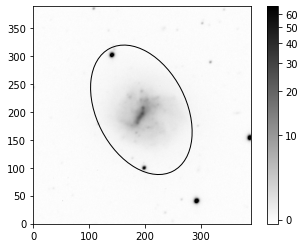

In [138]:
e.draw_guess_ellipse_mpl()


Number of apertures = 80



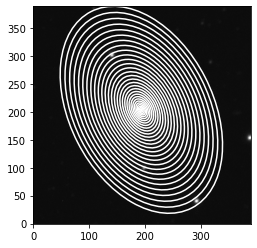

In [139]:
e.measure_phot()
e.draw_phot_results_mpl()

In [140]:
e.calc_sb()

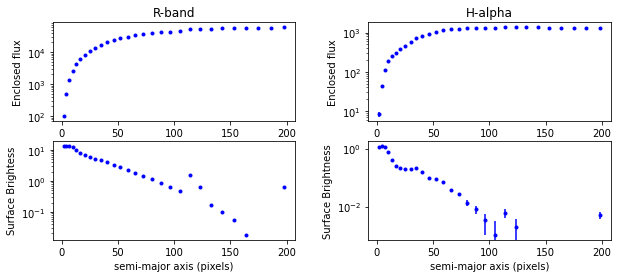

In [141]:
e.plot_profiles()

In [144]:
e.flux2

array([   8.295658,   42.65478 ,  109.681694,  184.56061 ,  247.48816 ,
        304.98422 ,  373.0057  ,  452.05515 ,  561.0542  ,  706.2703  ,
        838.04144 ,  934.8009  , 1045.0308  , 1148.7103  , 1211.8251  ,
       1265.7664  , 1298.1184  , 1320.7909  , 1331.4574  , 1335.1058  ,
       1359.651   , 1368.2914  , 1358.182   , 1346.6566  , 1331.0308  ,
       1308.7858  , 1286.2378  , 1267.1958  , 1315.459   ], dtype=float32)

In [145]:
e.apertures_a

array([  1.925,   4.2  ,   6.825,   9.8  ,  13.125,  16.8  ,  20.825,
        25.2  ,  29.925,  35.   ,  40.425,  46.2  ,  52.325,  58.8  ,
        65.625,  72.8  ,  80.325,  88.2  ,  96.425, 105.   , 113.925,
       123.2  , 132.825, 142.8  , 153.125, 163.8  , 174.825, 186.2  ,
       197.925])

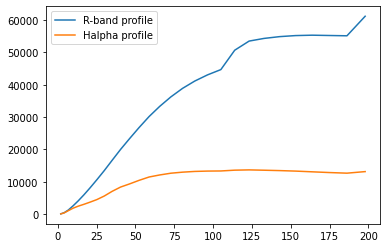

In [152]:
plt.figure()
plt.plot(e.apertures_a,e.flux1,label="R-band profile")
plt.plot(e.apertures_a,10*e.flux2,label="Halpha profile")
plt.legend()

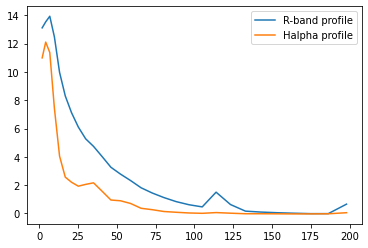

In [151]:
plt.figure()
plt.plot(e.apertures_a,e.sb1,label="R-band profile")
plt.plot(e.apertures_a,10*e.sb2,label="Halpha profile")
plt.legend()